In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import scipy as sps
from scipy import stats
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from scipy.stats import norm
import matplotlib.mlab as mlab
import scipy

In [75]:
df_list = [] 
a = ''
for file in os.listdir('dados/l_selecao/'): 
    if (('.~lock' in file)==False):
        if ('casa' in file):
            df = pd.read_csv('Resultados_casa_611/C_sele/v_1/'+file).rename(columns = {'key_resp_11.rt':'A.rt', \
                                                                                'key_resp_12.rt' : 'B.rt', \
                                                                                'key_resp_13.rt':'C.rt', \
                                                                                'key_resp_15.keys': 'resposta', \
                                                                                'key_resp_15.rt':'quest.rt'}).iloc[12:-2, :]
            
            df_list.append(df) 
           
        else:
             df = pd.read_csv('dados/l_selecao/'+file).rename(columns = {'key_resp_11.rt':'A.rt', \
                                                                                'key_resp_12.rt' : 'B.rt', \
                                                                                'key_resp_13.rt':'C.rt', \
                                                                                'key_resp_15.keys': 'resposta', \
                                                                                'key_resp_15.rt':'quest.rt'}).iloc[4:-1, :]
          
             df_list.append(df) 
#final_df = df.append(df for df in df_list) 
#final_df.to_csv('final.csv', index=False) 

In [88]:
dfs_foco = pd.read_csv('preprocessed_l.csv')

In [89]:
condicoes = pd.read_excel('Condicoes.xlsx')
condicoes['frase'] = ['L_'+str(i) for i in range(1,145)]

<ipython-input-89-e7bb7238e470>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  condicoes = pd.read_excel('Condicoes.xlsx')


In [90]:
condicoes

,condicoes,frase
0,S_CE,L_1
1,S_EC,L_2
2,A_CE,L_3
3,A_EC,L_4
4,C,L_5
...,...,...
139,S_EC,L_140
140,A_CE,L_141
141,A_EC,L_142
142,C,L_143


In [91]:
dfs = pd.concat([df[['participant', 'soundsA', 'A.rt', 'B.rt', 'C.rt', 'resposta', 'quest.rt']] for df in df_list])

In [92]:
dfs.shape

(2628, 7)

In [93]:
def files(soundsA):
    return soundsA[soundsA.index('/'):soundsA.index('A')]

In [94]:
audio_files = [soundsA[soundsA.index('/')+1:soundsA.index('A')] for soundsA in dfs.soundsA.values]

In [95]:
dfs['frase'] = audio_files

In [96]:
treino = []
for audio in audio_files:
    if ('L' in audio):
        treino.append('foco')
    else:
        treino.append('distratora')

In [97]:
dfs['foco'] = treino

In [98]:
dfs.head()

,participant,soundsA,A.rt,B.rt,C.rt,resposta,quest.rt,frase,foco
4,Leticia_2511,l_selecao_v1_wav/D_7A.wav,1.055590,1.466445,1.402730,s,3.47772,D_7,distratora
5,Leticia_2511,l_selecao_v1_wav/L_109A.wav,1.079440,1.944030,0.960350,s,1.00380,L_109,foco
6,Leticia_2511,l_selecao_v1_wav/D_12A.wav,0.551805,2.035360,2.084545,n,0.88687,D_12,distratora
7,Leticia_2511,l_selecao_v1_wav/S_6A.wav,0.769715,0.985625,0.563105,s,1.23893,S_6,distratora
8,Leticia_2511,l_selecao_v1_wav/L_94A.wav,0.652570,0.718760,0.758215,s,1.21395,L_94,foco


In [99]:
dfs.head()

,participant,soundsA,A.rt,B.rt,C.rt,resposta,quest.rt,frase,foco
4,Leticia_2511,l_selecao_v1_wav/D_7A.wav,1.055590,1.466445,1.402730,s,3.47772,D_7,distratora
5,Leticia_2511,l_selecao_v1_wav/L_109A.wav,1.079440,1.944030,0.960350,s,1.00380,L_109,foco
6,Leticia_2511,l_selecao_v1_wav/D_12A.wav,0.551805,2.035360,2.084545,n,0.88687,D_12,distratora
7,Leticia_2511,l_selecao_v1_wav/S_6A.wav,0.769715,0.985625,0.563105,s,1.23893,S_6,distratora
8,Leticia_2511,l_selecao_v1_wav/L_94A.wav,0.652570,0.718760,0.758215,s,1.21395,L_94,foco


In [100]:
conds = []
for frase in dfs[dfs.foco=='foco'].frase:
    conds.append(condicoes[condicoes.frase==frase].condicoes.values[0])

In [101]:
dfs_foco = dfs[dfs.foco=='foco']
dfs_foco['condicao'] = conds

<ipython-input-101-1e5325cbbdcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_foco['condicao'] = conds


In [102]:
dfs_foco.head()

,participant,soundsA,A.rt,B.rt,C.rt,resposta,quest.rt,frase,foco,condicao
5,Leticia_2511,l_selecao_v1_wav/L_109A.wav,1.079440,1.944030,0.960350,s,1.003800,L_109,foco,S_CE
8,Leticia_2511,l_selecao_v1_wav/L_94A.wav,0.652570,0.718760,0.758215,s,1.213950,L_94,foco,A_EC
10,Leticia_2511,l_selecao_v1_wav/L_49A.wav,1.128935,0.409260,0.683385,s,0.772675,L_49,foco,S_CE
12,Leticia_2511,l_selecao_v1_wav/L_77A.wav,0.722540,0.433905,0.443615,s,0.802755,L_77,foco,C
13,Leticia_2511,l_selecao_v1_wav/L_29A.wav,0.922965,0.653115,0.778515,s,1.233390,L_29,foco,C


In [103]:
len(np.sort(dfs_foco[dfs_foco.condicao=='C'].soundsA.unique()))

18

In [104]:
df_time = pd.DataFrame(np.array([dfs_foco['A.rt'].values, dfs_foco['B.rt'], dfs_foco['C.rt']]).flatten(), columns=['time'])

In [105]:
names, ns, ss = [], [], []
for name, group in dfs_foco[dfs_foco.condicao=='E'].groupby('frase'):
    names.append(name)
    ns.append(group[group['resposta']=='n'].shape[0]*100/group.shape[0])
    ss.append(group[group['resposta']=='s'].shape[0]*100/group.shape[0])


In [106]:
pd.DataFrame(data = {'frase_E':names, 'n':ns, 's':ss})

,frase_E,n,s
0,L_102,80.000000,20.000000
1,L_108,72.727273,27.272727
2,L_114,90.000000,10.000000
3,L_12,80.000000,20.000000
4,L_120,54.545455,45.454545
5,L_126,33.333333,66.666667
6,L_144,80.000000,20.000000
7,L_24,63.636364,36.363636
8,L_30,80.000000,20.000000
9,L_36,81.818182,18.181818


In [107]:
names, ns, ss = [], [], []
for name, group in dfs_foco[dfs_foco.condicao=='C'].groupby('frase'):
    names.append(name)
    ns.append(group[group['resposta']=='n'].shape[0]*100/group.shape[0])
    ss.append(group[group['resposta']=='s'].shape[0]*100/group.shape[0])


In [108]:
pd.DataFrame(data = {'frase_C':names, 'n':ns, 's':ss})

,frase_C,n,s
0,L_101,0.000000,100.000000
1,L_107,0.000000,100.000000
2,L_11,0.000000,100.000000
3,L_113,9.090909,90.909091
4,L_119,30.000000,70.000000
5,L_125,0.000000,100.000000
6,L_143,18.181818,81.818182
7,L_23,20.000000,80.000000
8,L_29,9.090909,90.909091
9,L_35,0.000000,100.000000


In [28]:
dfs_foco.head()

,participant,soundsA,A.rt,B.rt,C.rt,resposta,quest.rt,frase,foco,condicao
5,Leticia_2511,l_selecao_v1_wav/L_109A.wav,1.079440,1.944030,0.960350,s,1.003800,L_109,foco,S_CE
8,Leticia_2511,l_selecao_v1_wav/L_94A.wav,0.652570,0.718760,0.758215,s,1.213950,L_94,foco,A_EC
10,Leticia_2511,l_selecao_v1_wav/L_49A.wav,1.128935,0.409260,0.683385,s,0.772675,L_49,foco,S_CE
12,Leticia_2511,l_selecao_v1_wav/L_77A.wav,0.722540,0.433905,0.443615,s,0.802755,L_77,foco,C
13,Leticia_2511,l_selecao_v1_wav/L_29A.wav,0.922965,0.653115,0.778515,s,1.233390,L_29,foco,C


In [29]:
dfs_foco[['A.rt', 'B.rt', 'C.rt', 'quest.rt']].max()

A.rt        19.431715
B.rt        15.294000
C.rt        30.090915
quest.rt    68.486710
dtype: float64

In [33]:
dfs_foco.head()

,participant,soundsA,A.rt,B.rt,C.rt,resposta,quest.rt,frase,foco,condicao
5,Leticia_2511,l_selecao_v1_wav/L_109A.wav,1.079440,1.944030,0.960350,s,1.003800,L_109,foco,S_CE
8,Leticia_2511,l_selecao_v1_wav/L_94A.wav,0.652570,0.718760,0.758215,s,1.213950,L_94,foco,A_EC
10,Leticia_2511,l_selecao_v1_wav/L_49A.wav,1.128935,0.409260,0.683385,s,0.772675,L_49,foco,S_CE
12,Leticia_2511,l_selecao_v1_wav/L_77A.wav,0.722540,0.433905,0.443615,s,0.802755,L_77,foco,C
13,Leticia_2511,l_selecao_v1_wav/L_29A.wav,0.922965,0.653115,0.778515,s,1.233390,L_29,foco,C


## Respostas

In [109]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.02, barh=.01, fs=None, maxasterix=4):
    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05
        if (np.round(data, 3) == 0.051):
            data = 0.05
        while data <= p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break
        if (text=='****'):
            text='***'
        if len(text) == 0:
            text ='n.s.'
    '''if (text!='n. s.'):
        if (len(text)==1):
            text='p ='+str(np.round(data, 3))+'\n'+text
        elif (len(text)==2):
            text='p ='+str(np.round(data, 3))+'\n'+text
        elif (len(text)==3):
            text='p < 0.0005'+str(np.round(data, 3))+text
        '''
    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

In [110]:
df_time_sem = pd.DataFrame(np.array([dfs_foco[(dfs_foco.condicao=='C') | (dfs_foco.condicao=='E')]['A.rt'].values, dfs_foco[(dfs_foco.condicao=='C') | (dfs_foco.condicao=='E')]['B.rt'], dfs_foco[(dfs_foco.condicao=='C') | (dfs_foco.condicao=='E')]['C.rt']]).flatten(), columns=['time'])

In [111]:
df_time_com = pd.DataFrame(np.array([dfs_foco[(dfs_foco.condicao!='C') & (dfs_foco.condicao!='E')]['A.rt'].values, dfs_foco[(dfs_foco.condicao!='C') & (dfs_foco.condicao!='E')]['B.rt'], dfs_foco[(dfs_foco.condicao!='C') & (dfs_foco.condicao!='E')]['C.rt']]).flatten(), columns=['time'])

<AxesSubplot:>

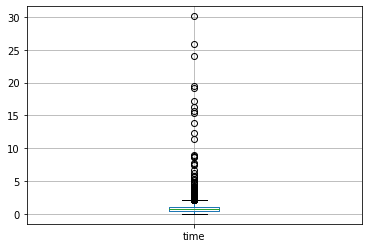

In [112]:
df_time.boxplot(column=['time'])

In [113]:
df_time_sem['time'].quantile(.995)

5.0131639999998985

In [114]:
df_time_com['time'].quantile(.995)

8.673293399999986

In [42]:
df_time.head()

,time
0,1.079440
1,0.652570
2,1.128935
3,0.722540
4,0.922965


In [115]:
df_time_sem['time'].quantile(0.994)

4.372979100000008

In [116]:
df_sup = dfs_foco[['A.rt', 'B.rt', 'C.rt', 'quest.rt']]
'''for col in df_sup.columns[:-1]:
    df_sup[df_sup[col] > df_time['time'].quantile(0.996)] = np.NaN'''
#df_sup[df_sup>3.84] = np.NaN
df_sup['frase'] = dfs_foco.frase
df_sup['resposta'] = dfs_foco.resposta
df_sup['condicao'] = dfs_foco.condicao
df_sup['participant'] = dfs_foco.participant
df = df_sup[df_sup.frase!='L_58']

<ipython-input-116-71d9e2c3ea3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sup['frase'] = dfs_foco.frase
<ipython-input-116-71d9e2c3ea3d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sup['resposta'] = dfs_foco.resposta
<ipython-input-116-71d9e2c3ea3d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [117]:
def disflu(condicao):
    if (condicao=='E' or condicao=='C'):
        return 0
    else:
        return 1

In [118]:
df['disfluency'] = df.condicao.apply(disflu)

<ipython-input-118-6c39ab9f8f7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['disfluency'] = df.condicao.apply(disflu)


In [119]:
df.head()

,A.rt,B.rt,C.rt,quest.rt,frase,resposta,condicao,participant,disfluency
5,1.079440,1.944030,0.960350,1.003800,L_109,s,S_CE,Leticia_2511,1
8,0.652570,0.718760,0.758215,1.213950,L_94,s,A_EC,Leticia_2511,1
10,1.128935,0.409260,0.683385,0.772675,L_49,s,S_CE,Leticia_2511,1
12,0.722540,0.433905,0.443615,0.802755,L_77,s,C,Leticia_2511,0
13,0.922965,0.653115,0.778515,1.233390,L_29,s,C,Leticia_2511,0


In [120]:
def trans_participante(df):
    dfs = []
    for name, group in df.groupby('participant'):
        dfx = group
        for trecho in (['A.rt', 'B.rt', 'C.rt', 'quest.rt']):
            mean = dfx[trecho].mean()
            std =  dfx[trecho].std()
            dfx.loc[dfx[trecho] > mean+std, trecho] = np.NaN
        dfs.append(dfx)
    return pd.concat(dfs)

In [123]:
disf = trans_participante(df[df.disfluency==1])

In [124]:
ndisf = trans_participante(df[df.disfluency==0])
ndisf[ndisf.participant=='Laira']

,A.rt,B.rt,C.rt,quest.rt,frase,resposta,condicao,participant,disfluency
14,0.695400,0.536140,0.467160,0.188360,L_102,n,E,Laira,0
16,0.690625,0.361780,0.321680,0.918005,L_42,n,E,Laira,0
21,1.665280,0.241860,0.250290,1.475760,L_107,s,C,Laira,0
35,NaN,NaN,NaN,0.834305,L_89,s,C,Laira,0
37,2.594240,0.606565,0.103425,NaN,L_5,s,C,Laira,0
42,0.832980,0.550850,NaN,1.833135,L_144,s,E,Laira,0


In [125]:
df_trans = pd.concat([disf, ndisf])

Text(0, 0.5, 'ocorrências')

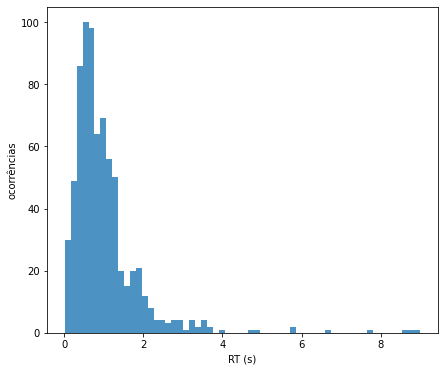

In [131]:
ax, fig = plt.subplots(figsize=(7,6))
plt.hist(df[(df.disfluency==1)]['B.rt'].values, 60, alpha=.8)
#best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
#plt.plot(bins, best_fit_line, color='blue')
plt.grid(False)
plt.xlabel('RT (s)')
plt.ylim()
#plt.xlim(-0.1,5)
plt.ylabel('ocorrências')
#plt.savefig('Tempos/hist.jpg', bbox_inches='tight', dpi=150)

<AxesSubplot:>

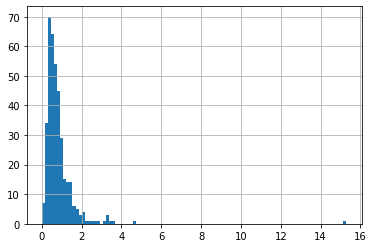

In [132]:
df[df.disfluency==0]['B.rt'].hist(bins=100)

<AxesSubplot:>

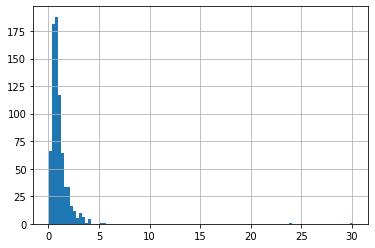

In [133]:
df[df.disfluency==1]['C.rt'].hist(bins=100)

[27.65957447 19.92513369 35.29411765]
Ttest_indResult(statistic=-1.2851046820041097, pvalue=0.1995531029570785)
Ttest_indResult(statistic=1.5929489788272082, pvalue=0.11201866510360681)
Ttest_indResult(statistic=2.884477743418379, pvalue=0.004148834623580341)
[89.94708995 61.27683616 79.89417989]
Ttest_indResult(statistic=-6.37557178911816, pvalue=5.526448851453627e-10)
Ttest_indResult(statistic=-2.750962851470278, pvalue=0.006229445374752534)
Ttest_indResult(statistic=2.884477743418379, pvalue=0.004148834623580341)


<ipython-input-134-797dae9103e5>:53: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig2.tight_layout(pad=2)


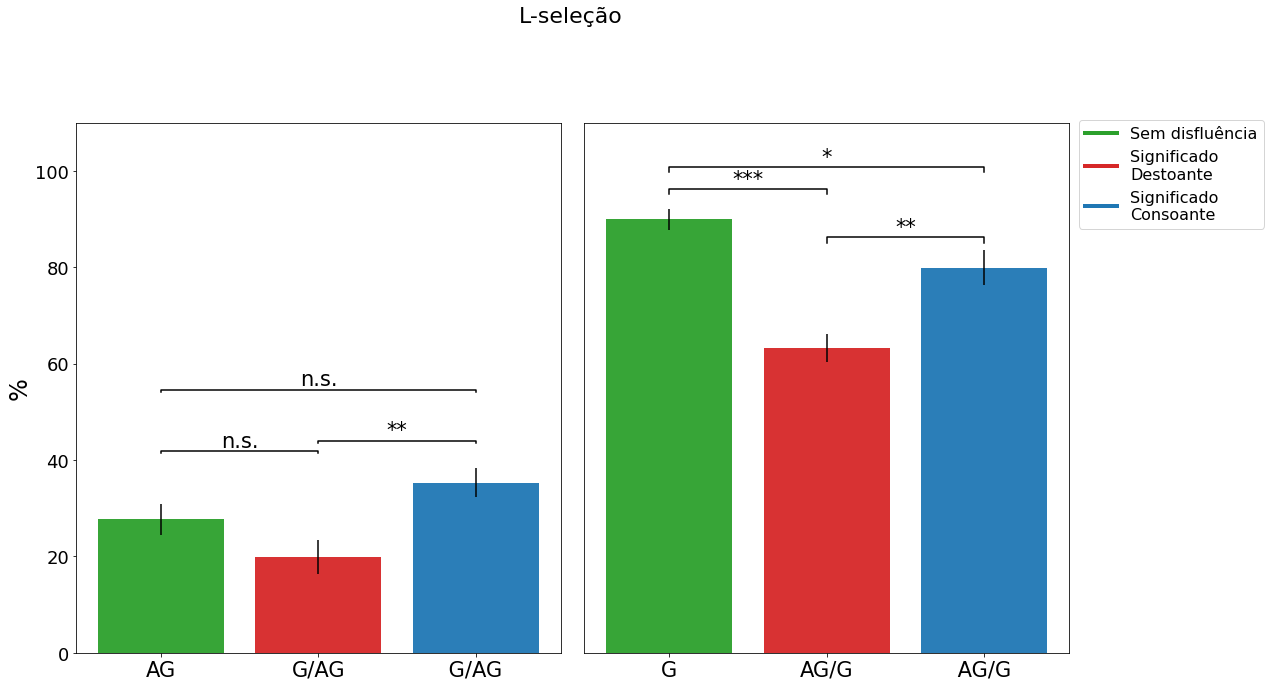

In [134]:
fig2 = plt.figure(constrained_layout=True, figsize=(18,9))
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig2)

l_c = df[df.condicao=='C']['resposta'].replace(['s', 'n'], [1, 0]).values
l_e = df[df.condicao=='E']['resposta'].replace(['s', 'n'], [1, 0]).values
l_sce = df[df.condicao=='S_CE']['resposta'].replace(['s', 'n'], [1, 0]).values
l_ace = df[df.condicao=='A_CE']['resposta'].replace(['s', 'n'], [1, 0]).values
l_sec = df[df.condicao=='S_EC']['resposta'].replace(['s', 'n'], [1, 0]).values
l_aec = df[df.condicao=='A_EC']['resposta'].replace(['s', 'n'], [1, 0]).values

f=21
f2_ax2 = fig2.add_subplot(spec2[0, 0])
heights = np.array([l_e.mean()*100, l_ace.mean()*100-2, l_sce.mean()*100])
print(heights)
yerr = [sps.stats.sem(l_e*100), sps.stats.sem(l_sce*100), sps.stats.sem(l_ace*100)]
plt.bar([0,1,2], heights ,  color=['tab:green', 'tab:red', 'tab:blue'], yerr=yerr, lw=10, alpha=.95)
plt.xticks([0,1,2], labels=['AG', 'G/AG', ' G/AG '], fontsize=21)

barplot_annotate_brackets(0, 1, stats.ttest_ind(l_ace, l_e)[1], np.array([0,1,2]), heights+13, fs=f)
print(stats.ttest_ind(l_ace, l_e))
barplot_annotate_brackets(0, 2, stats.ttest_ind(l_sce, l_e)[1], np.array([0,1,2]), heights+18, fs=f)
print(stats.ttest_ind(l_sce, l_e))
barplot_annotate_brackets(1, 2, stats.ttest_ind(l_sce, l_ace)[1], np.array([0,1,2]), heights+7, fs=f)
print(stats.ttest_ind(l_sce, l_ace))

plt.ylim(0,110)
plt.yticks(np.arange(0,120,20), fontsize=18)
plt.ylabel('%', fontsize=24)


f2_ax2 = fig2.add_subplot(spec2[0, 1])
plt.ylim(0,110)
plt.yticks([])
yerr = [sps.stats.sem(l_c*100), sps.stats.sem(l_sec*100), sps.stats.sem(l_aec*100)]
heights = np.array([l_c.mean()*100, l_aec.mean()*100-2, l_sec.mean()*100])
print(heights)
plt.bar([0,1,2], [l_c.mean()*100, l_aec.mean()*100, l_sec.mean()*100],yerr=yerr,  color=['tab:green', 'tab:red', 'tab:blue'],  lw=10, alpha=.95)
plt.xticks([0,1,2], labels=['G', 'AG/G', ' AG/G '], fontsize=21)
barplot_annotate_brackets(0, 1, stats.ttest_ind(l_aec, l_c)[1], np.array([0,1,2]), heights+3, fs=f)
print(stats.ttest_ind(l_aec, l_c))
barplot_annotate_brackets(0, 2, stats.ttest_ind(l_sec, l_c)[1], np.array([0,1,2]), heights+7.5, fs=f)
print(stats.ttest_ind(l_sec, l_c))
barplot_annotate_brackets(1, 2, stats.ttest_ind(l_sce, l_ace)[1], np.array([0,1,2]), heights+3, fs=f)
print(stats.ttest_ind(l_sce, l_ace))

custom_lines = [Line2D([0], [0], color='tab:green', lw=4),
                Line2D([0], [0], color='tab:red', lw=4),
                Line2D([0], [0], color='tab:blue', lw=4)]
plt.legend(custom_lines, ['Sem disfluência', 'Significado\nDestoante', 'Significado\nConsoante'], loc=(1.02,.8), fontsize=16)


plt.suptitle('L-seleção', x=.45, y=1.07, fontsize=22)
fig2.tight_layout(pad=2)
#plt.savefig('14mar/L_sele.png', dpi=150, bbox_inches='tight')

[27.65957447 19.92513369 35.29411765]
[89.94708995 61.27683616 79.89417989]


<ipython-input-135-5841dc95fbb2>:51: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig2.tight_layout(pad=2)


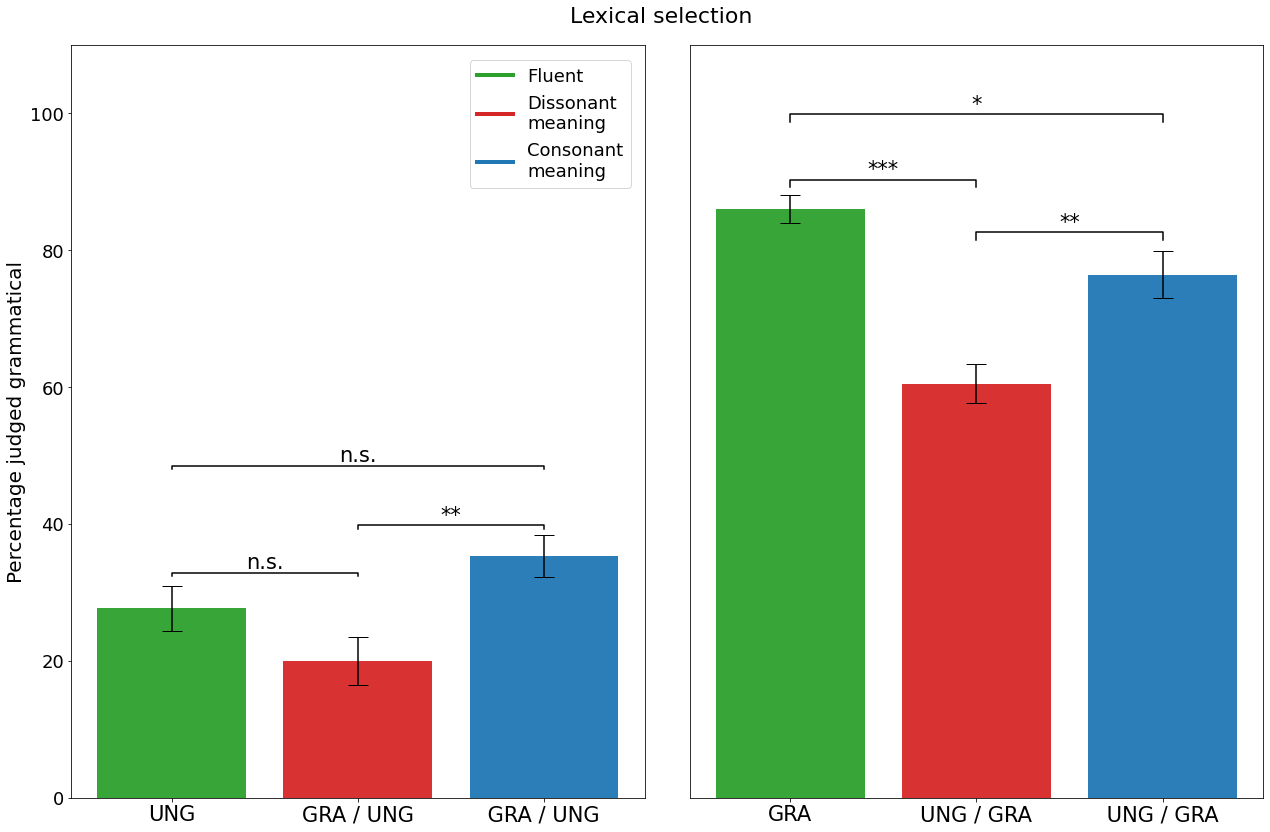

In [135]:
fig2 = plt.figure(constrained_layout=True, figsize=(18,12))
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig2)

l_c = df[df.condicao=='C']['resposta'].replace(['s', 'n'], [1, 0]).values
l_e = df[df.condicao=='E']['resposta'].replace(['s', 'n'], [1, 0]).values
l_sce = df[df.condicao=='S_CE']['resposta'].replace(['s', 'n'], [1, 0]).values
l_ace = df[df.condicao=='A_CE']['resposta'].replace(['s', 'n'], [1, 0]).values
l_sec = df[df.condicao=='S_EC']['resposta'].replace(['s', 'n'], [1, 0]).values
l_aec = df[df.condicao=='A_EC']['resposta'].replace(['s', 'n'], [1, 0]).values

f=21
f2_ax2 = fig2.add_subplot(spec2[0, 0])
heights = np.array([l_e.mean()*100, l_ace.mean()*100-2, l_sce.mean()*100])
print(heights)
yerr = [sps.stats.sem(l_e*100), sps.stats.sem(l_sce*100), sps.stats.sem(l_ace*100)]
plt.bar([0,1,2], heights ,  color=['tab:green', 'tab:red', 'tab:blue'], yerr=yerr, capsize=10, lw=10, alpha=.95)
plt.xticks([0,1,2], labels=['UNG', 'GRA / UNG', ' GRA / UNG '], fontsize=21)

barplot_annotate_brackets(0, 1, stats.ttest_ind(l_ace, l_e)[1], np.array([0,1,2]), heights+4, fs=f)
barplot_annotate_brackets(0, 2, stats.ttest_ind(l_sce, l_e)[1], np.array([0,1,2]), heights+12, fs=f)
barplot_annotate_brackets(1, 2, stats.ttest_ind(l_sce, l_ace)[1], np.array([0,1,2]), heights+3, fs=f)

plt.ylim(0,110)
plt.yticks(np.arange(0,120,20), fontsize=18)
plt.ylabel('Percentage judged grammatical', fontsize=20)
custom_lines = [Line2D([0], [0], color='tab:green', lw=4),
                Line2D([0], [0], color='tab:red', lw=4),
                Line2D([0], [0], color='tab:blue', lw=4)]
plt.legend(custom_lines, ['Fluent', 'Dissonant\nmeaning', 'Consonant\nmeaning'], loc=(.695,.81), fontsize=18)


f2_ax2 = fig2.add_subplot(spec2[0, 1])
plt.ylim(0,115)
plt.yticks([])
yerr = [sps.stats.sem(l_c*100), sps.stats.sem(l_sec*100), sps.stats.sem(l_aec*100)]
heights = np.array([l_c.mean()*100, l_aec.mean()*100-2, l_sec.mean()*100])
print(heights)
plt.bar([0,1,2], [l_c.mean()*100, l_aec.mean()*100, l_sec.mean()*100],yerr=yerr, capsize=10,  color=['tab:green', 'tab:red', 'tab:blue'],  lw=10, alpha=.95)
plt.xticks([0,1,2], labels=['GRA', 'UNG / GRA', ' UNG / GRA '], fontsize=21)
barplot_annotate_brackets(0, 1, stats.ttest_ind(l_aec, l_c)[1], np.array([0,1,2]), heights+1, fs=f)
barplot_annotate_brackets(0, 2, stats.ttest_ind(l_sec, l_c)[1], np.array([0,1,2]), heights+11, fs=f)
barplot_annotate_brackets(1, 2, stats.ttest_ind(l_sce, l_ace)[1], np.array([0,1,2]), heights+3, fs=f)

'''custom_lines = [Line2D([0], [0], color='tab:green', lw=4),
                Line2D([0], [0], color='tab:red', lw=4),
                Line2D([0], [0], color='tab:blue', lw=4)]
plt.legend(custom_lines, ['Fluent', 'Dissonant\nmeaning', 'Consonant\nmeaning'], loc=(1.02,.76), fontsize=18)'''


plt.suptitle('Lexical selection', x=.52, y=.97, fontsize=22)
fig2.tight_layout(pad=2)
#plt.savefig('14mar/L_sele_UNG_GRA.png', dpi=300, facecolor='white', bbox_inches='tight')

## Tempos

In [219]:
def tempo_rt(trecho,mark, savefig, ylim):
    yerr = []
    df = df_trans
    conds = [*df.groupby('condicao').groups.keys()]
    for name, group in df.groupby('condicao'):
        yerr.append(sps.stats.sem(group[trecho+'.rt'].fillna(0)))
    fig, ax = plt.subplots(figsize=(10,8))
    plt.bar(df.groupby('condicao').groups.keys(), df.groupby('condicao')[trecho+'.rt'].mean().values, \
            color = ['tab:red', 'tab:red', 'tab:green', 'tab:green', 'tab:blue', 'tab:blue'], \
           yerr = yerr, align='center', capsize=6)
    
    plt.title('Trecho '+trecho)
    plt.xticks(np.arange(6), labels=['CE', 'EC', 'C', 'E', 'CE', 'EC'])
    plt.ylabel('s')
    if (ylim==0):
        plt.ylim(0,1.2)
    else:
        plt.ylim(0,ylim)
    custom_lines = [Line2D([0], [0], color='tab:green', lw=4),
                    Line2D([0], [0], color='tab:red', lw=4),
                    Line2D([0], [0], color='tab:blue', lw=4)]
    for  i in range(len(mark)):
        a1 = df.groupby('condicao').get_group(conds[mark[i][0]])[trecho+'.rt'].dropna(0)
        a2 = df.groupby('condicao').get_group(conds[mark[i][1]])[trecho+'.rt'].dropna(0)
        barplot_annotate_brackets(mark[i][0], mark[i][1], stats.ttest_ind(a1, a2)[1], np.arange(len(conds)), df.groupby('condicao')[trecho+'.rt'].mean().values+.07)
        print(stats.ttest_ind(a1, a2)[1])
    plt.legend(custom_lines, ['Sem disfluência', 'Verbos de significado\ndestoante', 'Verbos de significado\nconsoante'], loc=(1.02,.84))
    if (savefig):
        plt.savefig('Tempos/'+trecho+'.png', bbox_inches='tight')

In [220]:
conds = [*df.groupby('condicao').groups.keys()]

In [221]:
mark = [[0,1]]


In [222]:
a1 = df[df.condicao=='S_CE']['A.rt'].dropna()
a2 = df[df.condicao=='S_EC']['A.rt'].dropna()

In [223]:
a = [group['A.rt'].fillna(0).values.tolist() for name, group in df.groupby('condicao')]
stats.f_oneway(a[0], a[1], a[2], a[3], a[4], a[5])

F_onewayResult(statistic=1.3096890219028943, pvalue=0.2574358578971055)

0.2574989671138721
0.8501757441484566
0.2396935095222206


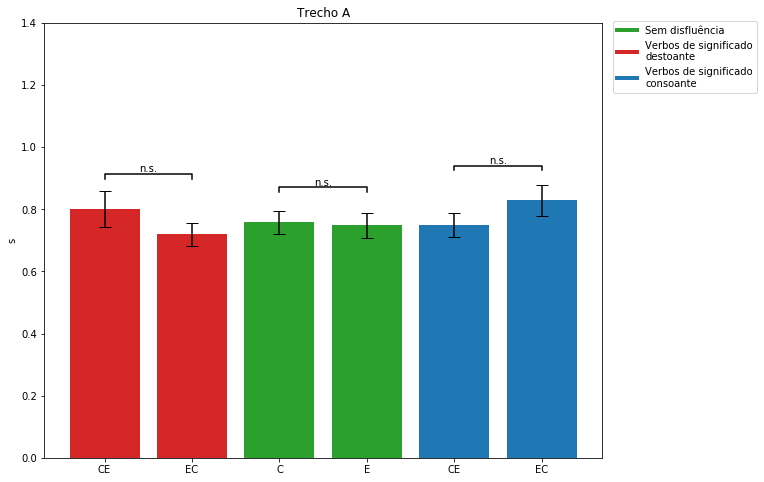

In [224]:
tempo_rt('A',[[0,1],[2, 3], [4,5]], False, 1.4)

In [225]:
a1 = df[df.condicao=='S_CE']['B.rt'].dropna(0)
a2 = df[df.condicao=='S_EC']['B.rt'].dropna(0)
stats.ttest_ind(a1, a2)[1].round(3)

0.085

In [226]:
df[df.condicao=='S_EC']

,A.rt,B.rt,C.rt,quest.rt,frase,resposta,condicao,participant,disfluency
14,0.567690,0.123190,0.685325,2.271780,L_98,n,S_EC,Rafael Abel F G dos Santos,1
16,17.257760,0.416025,0.434370,0.989780,L_38,n,S_EC,Rafael Abel F G dos Santos,1
42,0.303340,0.289505,2.160755,1.325870,L_140,s,S_EC,Rafael Abel F G dos Santos,1
12,2.043485,0.723385,1.227840,0.232850,L_74,s,S_EC,Laira,1
13,0.560070,0.141795,0.602105,0.643085,L_26,s,S_EC,Laira,1
...,...,...,...,...,...,...,...,...,...
12,0.436485,0.566950,0.811235,1.154295,L_74,s,S_EC,Arthur Jordão,1
13,0.383150,0.938905,0.383375,10.348165,L_26,s,S_EC,Arthur Jordão,1
14,1.423385,0.971135,4.047525,0.802825,L_98,s,S_EC,Clayton_2811,1
16,0.416835,0.732305,1.130660,8.390975,L_38,s,S_EC,Clayton_2811,1


In [227]:
np.sort(df[df.condicao=='S_EC']['B.rt'])

array([0.050845, 0.073855, 0.092   , 0.118835, 0.12319 , 0.12923 ,
       0.13351 , 0.141795, 0.207165, 0.225895, 0.249155, 0.258835,
       0.279885, 0.289505, 0.294385, 0.30144 , 0.30527 , 0.32021 ,
       0.334   , 0.342495, 0.34351 , 0.35146 , 0.355045, 0.355555,
       0.356005, 0.36205 , 0.368235, 0.380125, 0.39422 , 0.39932 ,
       0.401825, 0.409355, 0.416025, 0.419695, 0.423305, 0.433925,
       0.43972 , 0.4408  , 0.44115 , 0.44522 , 0.45229 , 0.455375,
       0.45916 , 0.461105, 0.4673  , 0.474045, 0.477945, 0.484065,
       0.489   , 0.503   , 0.509   , 0.54    , 0.54552 , 0.557325,
       0.56695 , 0.56784 , 0.5695  , 0.573985, 0.57706 , 0.585   ,
       0.594605, 0.60227 , 0.610845, 0.611175, 0.61673 , 0.62021 ,
       0.621165, 0.63213 , 0.63992 , 0.6454  , 0.651275, 0.65143 ,
       0.65644 , 0.65909 , 0.664   , 0.66982 , 0.6779  , 0.685   ,
       0.68644 , 0.701535, 0.701845, 0.702575, 0.70381 , 0.703865,
       0.70654 , 0.711155, 0.723385, 0.727   , 0.732305, 0.738

0.8118811949229016
0.827300616783928
0.5192426216503925


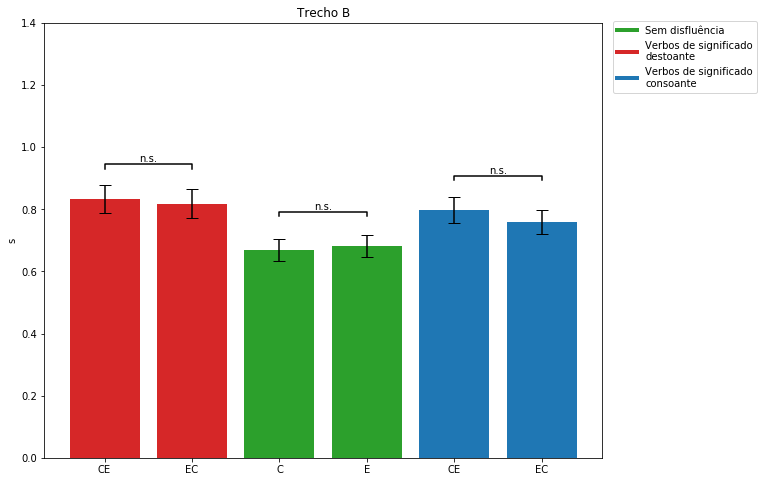

In [237]:
tempo_rt('B', [[0,1],[2,3], [4,5]], False, 1.4)

In [231]:
a1 = df[df.condicao=='S_CE']['C.rt'].dropna(0)
a2 = df[df.condicao=='S_EC']['C.rt'].dropna(0)

In [232]:
np.round(stats.ttest_ind(a1, a2)[1], 3)

0.1

Text(0.5, 1.0, 'C')

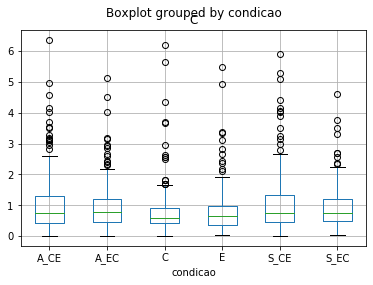

In [549]:
df.boxplot(column=['C.rt'],by='condicao')
plt.title('C')

Text(0.5, 1.0, 'Online\n\nC')

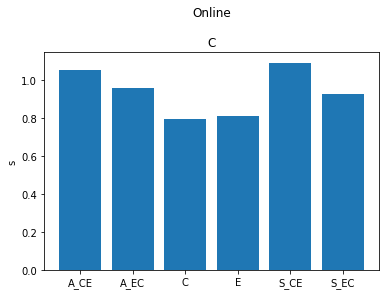

In [550]:
plt.bar(df.groupby('condicao').groups.keys(), df.groupby('condicao')['C.rt'].mean().values)
plt.title('C')
plt.ylabel('s')
plt.title('Online\n\nC')
#plt.savefig('Rt.C.Online.png', bbox_inches='tight')

<BarContainer object of 4 artists>

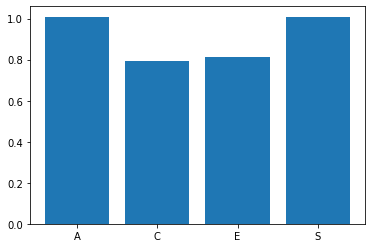

In [551]:
plt.bar(df_y.groupby('condicao').groups.keys(), df_y.groupby('condicao')['C.rt'].mean().values)
#plt.savefig('Rt.C.Grouped_Online.png', bbox_inches='tight')

## Tempo - Resposta

Text(0.5, 0.98, '')

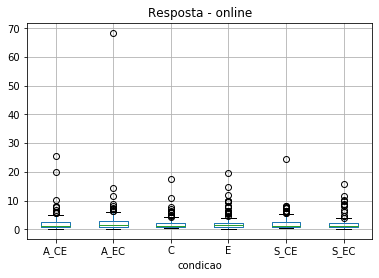

In [403]:
df.boxplot(column=['quest.rt'],by='condicao')
plt.title('Resposta - online')
plt.suptitle('')
#plt.savefig('Resposta_boxplot_casa.png', bbox_inches='tight')

In [488]:
df[df['quest.rt']>60]

,A.rt,B.rt,C.rt,quest.rt,frase,resposta,condicao,participant


In [422]:
df[df['quest.rt'] > df_sup['quest.rt'].quantile(0.995)] = np.NaN

/home/leozeine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/leozeine/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
